In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import SVR

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 7)
%matplotlib inline

### Exploring the data
Creating a dataframe for training the model. Only using numeric features.

In [2]:
df = pd.read_csv('train.csv')
df = df.select_dtypes(include=[np.number])
df = df.drop('Id', axis=1)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


### Splitting data into train and test sets

In [3]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

### Handling NaN
NaN is handled here by using interpolation for numeric data.

In [4]:
print('train_x NaN:', train_x.isnull().sum().sum())
train_x = train_x.interpolate()
print('train_x NaN:', train_x.isnull().sum().sum())

print('test_x NaN:', test_x.isnull().sum().sum())
test_x = test_x.interpolate()
print('test_x NaN:', test_x.isnull().sum().sum())

train_x NaN: 287
train_x NaN: 0
test_x NaN: 61
test_x NaN: 0


### Scaling the data
z = (x - mean) / std

In [5]:
scaler = StandardScaler()
scaler.fit(train_x)

with open('scaler.save', 'wb') as f:
    pickle.dump(scaler, f)
    
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

print('Mean of train_x:', train_x.mean())
print('Std of train_x:', train_x.std())
print('Mean of test_x:', test_x.mean())
print('Std of test_x:', test_x.std())

Mean of train_x: 1.82994580084e-15
Std of train_x: 1.0
Mean of test_x: -0.0476373419082
Std of test_x: 0.958728766193


### Principal Component Analysis
Curve looks like we need all the features for better score.

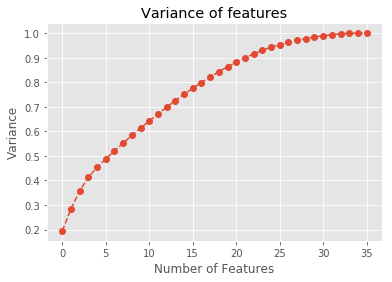

In [6]:
pca = PCA(n_components=36)
pca.fit(train_x)

plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
plt.title('Variance of features')
plt.xlabel('Number of Features')
plt.ylabel('Variance')
plt.show()

### Visualizing the target

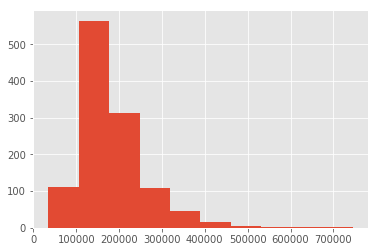

In [7]:
plt.hist(train_y)
plt.show()

#### Converting into a Gaussian Distribution
Taking Natural Logarithm

In [8]:
train_y = np.log(train_y)
test_y = np.log(test_y)

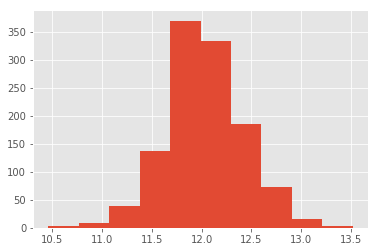

In [9]:
plt.hist(train_y)
plt.show()

In [10]:
model = SVR(kernel='linear')
model.fit(train_x, train_y)

r2 = model.score(test_x, test_y)
pred = model.predict(test_x)
mse = mean_squared_error(test_y, pred)

with open('linear_model_hp.model', 'wb') as f:
    pickle.dump(model, f)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')

R2: 0.8935461046963495
MSE: 0.019865735933807284
RMSE: 0.14094586171224496


### Plotting predictions

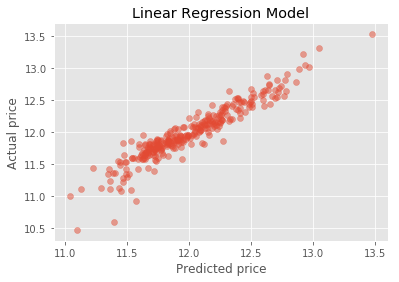

In [11]:
plt.scatter(pred, test_y, alpha=0.5)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

Taking antilog for the target.

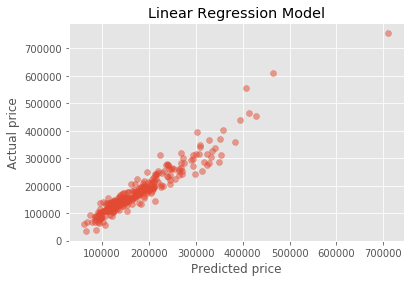

In [12]:
pred = np.exp(pred)
test_y = np.exp(test_y)

plt.scatter(pred, test_y, alpha=0.5)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

### Submissions

In [26]:
df1 = pd.read_csv('test.csv')
df1 = df1.select_dtypes(include=[np.number])
df = df1.drop('Id', axis=1)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


### Handling NaN

In [27]:
print('Total number of NaN:', df.isnull().sum().sum())
df = df.interpolate()
print('Total number of NaN:', df.isnull().sum().sum())

Total number of NaN: 330
Total number of NaN: 0


### Scaling the data

In [28]:
with open('scaler.save', 'rb') as f:
    scaler = pickle.load(f)

X = df.values
X = scaler.transform(X)
print(X.mean(), X.std())

-0.0280944128546 0.985320530956


### Predicting Sale Prices

In [32]:
with open('linear_model_hp.model', 'rb') as f:
    model = pickle.load(f)
    
pred = model.predict(X)

#### Taking antilog

In [33]:
print(pred)
pred = np.exp(pred)
print(pred)

[ 11.71917463  11.88623727  12.08197568 ...,  12.13200028  11.64410936
  12.40179902]
[ 122905.94003839  145253.71786279  176658.83825996 ...,  185720.89835526
  114017.74374492  243238.81485456]


### Exporting results to CSV

In [38]:
df_submission = pd.DataFrame()
df_submission['Id'] = df1['Id']
df_submission['SalePrice'] = pred

df_submission.head()

df_submission.to_csv('Submission_2.csv', index=False)